In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from zipfile import ZipFile
import os
os.chdir(r"C:\Users\Pranjali\Downloads")
gdf = gpd.read_file('india-village-census-2001-KA.shp')

In [2]:
district = gdf[['DISTRICT', 'geometry']]
districts = gdf.dissolve(by='DISTRICT', aggfunc = 'mean')

In [3]:
districts

,geometry,UID,CENSUS_COD,STATE,SUB_DIST,TOWN_VILL,ST_CODE,DIST_CODE,THSIL_CODE,BLOCK_CODE,...,TW_W_EL,TANK_IRR,RIVER_IRR,LAKE_IRR,W_FALL,OTH_IRR,TOT_IRR,UN_IRR,CULT_WASTE,AREA_NA_CU
DISTRICT,,,,,,,,,,,,,,,,,,,,,
0,"(POLYGON ((30204.2776792919 1359989.677255928,...",595704.536842,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,(POLYGON ((-222187.3310215415 1758109.09164818...,581991.282875,2.901000e+15,29.0,5.739297,7.371174e+05,28.512232,0.983180,5.656728,5.656728,...,48.485474,4.082569,46.762997,0.072630,0.487768,3.085627,254.590214,488.990826,42.758410,77.647554
2,POLYGON ((-1730.471964792814 1769541.356341665...,581444.132824,2.902000e+15,29.0,3.984733,8.923414e+05,28.468702,1.963359,3.928244,3.928244,...,42.439695,3.404580,49.216794,0.007634,0.581679,3.064122,232.341985,546.487023,32.751145,76.801527
3,POLYGON ((-88685.33611396549 1823427.214173264...,579783.110949,2.903000e+15,29.0,3.087591,5.745790e+05,28.745985,2.973723,3.058394,3.058394,...,38.716788,6.862774,15.218978,0.027737,0.000000,2.738686,145.026277,1236.826277,27.264234,69.807299
4,"POLYGON ((112980.1670627751 1828871.571943098,...",579205.473720,2.904000e+15,29.0,5.864164,7.944430e+05,28.663481,3.953584,5.793857,5.793857,...,3.254608,6.164505,2.417747,0.068942,0.000000,0.316041,93.307850,811.776109,39.438908,70.994539
5,(POLYGON ((105674.3455140039 2044220.452220313...,577891.697161,2.905000e+15,29.0,2.908517,8.113210e+05,28.725552,4.952681,2.876972,2.876972,...,10.804416,3.228707,2.342271,0.011041,0.000000,6.607256,64.850158,570.326498,89.145110,62.649842
6,"POLYGON ((127440.2407145838 1767787.827929523,...",581749.783092,2.906000e+15,29.0,2.933259,9.088034e+05,28.709677,5.939933,2.909900,2.909900,...,5.721913,6.073415,4.284761,0.071190,0.000000,0.943270,127.191324,630.636263,34.110122,82.338154
7,"POLYGON ((-11246.5878489418 1693011.699560805,...",583606.834385,2.907000e+15,29.0,2.503155,8.994038e+05,28.771293,6.944795,2.481073,2.481073,...,48.176656,2.712934,1.119874,0.045741,8.875394,3.067823,131.201893,538.059937,40.766562,102.629338
8,POLYGON ((-60640.61251010164 1665454.920896787...,584092.700565,2.908000e+15,29.0,3.121469,1.652670e+06,28.262712,7.796610,3.048023,3.048023,...,34.646893,8.449153,6.672316,0.262712,0.000000,3.031073,146.861582,951.607345,18.090395,84.906780


In [4]:
#Sensitivity indicators
#Total population
popln = [0]
pindex = [0]
for i in range(1,28):
        popln.append(districts['T_P'][i])
for i in range(1,28):
    index = (popln[i]-min(popln))/(max(popln)-min(popln))
    pindex.append(index)

In [5]:
#tribal population
scst = [0]
scstindex = [0]
for i in range(1,28):
        scst.append((districts['SC_P'][i]+districts['ST_P'][i]))
for i in range(1,28):
    index = (scst[i]-min(scst))/(max(scst)-min(scst))
    scstindex.append(index)

In [6]:
#tribal female
scstf = [0]
scstfindex = [0]
for i in range(1,28):
        scstf.append((districts['SC_F'][i]+districts['ST_F'][i]))
for i in range(1,28):
    index = (scstf[i]-min(scstf))/(max(scstf)-min(scstf))
    scstfindex.append(index)

In [7]:
#Unirrigated area
unirra = [0]
unirrindex = [0]
for i in range(1,28):
        unirra.append((districts['UN_IRR'][i]))
for i in range(1,28):
    index = (unirra[i]-min(unirra))/(max(unirra)-min(unirra))
    unirrindex.append(index)

In [8]:
#Adaptive capacity indicators
#Irrigated area
irra = [0]
irrindex = [0]
for i in range(1,28):
        irra.append((districts['TOT_IRR'][i]))
for i in range(1,28):
    index = (irra[i]-min(irra))/(max(irra)-min(irra))
    irrindex.append(index)

In [9]:
#income
inc =[0]
incindex=[0]
for i in range(1,28):
        inc.append((districts['TOT_INC'][i]))
for i in range(1,28):
    index = (inc[i]-min(inc))/(max(inc)-min(inc))
    incindex.append(index)

In [10]:
#medical facilities(no.of hospitals and dispensaries)
hosp =[0]
hospindex=[0]
for i in range(1,28):
        hosp.append((districts['ALL_HOSP'][i]+districts['AYU_HOSP'][i]+districts['UN_HOSP'][i]+districts['HOM_HOSP'][i]+districts['ALL_DISP'][i]+districts['AYU_DISP'][i]+districts['UN_DISP'][i]+districts['HOM_DISP'][i]))
for i in range(1,28):
    index = (hosp[i]-min(hosp))/(max(hosp)-min(hosp))
    hospindex.append(index)

In [11]:
#no. of private doctors
pdr =[0]
pdrindex=[0]
for i in range(1,28):
        pdr.append((districts['RMP'][i]))
for i in range(1,28):
    index = (pdr[i]-min(pdr))/(max(pdr)-min(pdr))
    pdrindex.append(index)

In [12]:
#no. of subsided doctors
sdr =[0]
sdrindex=[0]
for i in range(1,28):
        sdr.append((districts['RMP'][i]))
for i in range(1,28):
    index = (sdr[i]-min(sdr))/(max(sdr)-min(sdr))
    sdrindex.append(index)

In [13]:
pw=[0]
tw=[0]
t1w=[0]
fw=[0]
iw=[0]
pin=[0]
t=[0]
unirr=[0]
for i in range(1,len(popln)):
    pw.append(((scst[i])/popln[i]))
    tw.append((1-(scst[i]/popln[i])))
    t1w.append(scstf[i]/scst[i])
    fw.append((1-(scstf[i]/scst[i])))
    pin.append(0.33*0.5*(pw[i]*pindex[i]))
    t.append(0.33*0.5*(tw[i]*(t1w[i]*scstindex[i]+fw[i]*scstfindex[i])))
    unirr.append(0.33*0.5*unirrindex[i])
 
    

In [14]:
S=[]
for i in range(28):
    S.append(pin[i]+t[i]+unirr[i])

In [15]:
#adaptive capacity
a=[0]
income=[0]
m=[0]
for i in range(1,28):
    a.append(0.33*0.33*(irrindex[i]))
    income.append(0.33*0.33*incindex[i])
    if(sdr[i]>=pdr[i]):
        m.append(0.33*0.33*(0.5*hospindex[i]+0.5*(sdr[i]/(sdr[i]+pdr[i]))*sdrindex[i]+0.5*(pdr[i]/(sdr[i]+pdr[i]))*pdrindex[i]))
    else:
        m.append(0.33*0.33*(0.5*hospindex[i]+0.5*(pdr[i]/(sdr[i]+pdr[i]))*sdrindex[i]+0.5*(sdr[i]/(sdr[i]+pdr[i]))*pdrindex[i]))

In [16]:
A=[]
for i in range(28):
    A.append(a[i]+income[i]+m[i])

In [17]:
import pandas as pd
exp = pd.read_excel(r"D:\All project data\rlindex-1951-1980-ka.xlsx")

In [18]:
E1 = 0.33*0.25*(exp['r1index'][:27]+exp['r2index'][:27]+exp['r3index'][:27]+exp['r5index'][:27])
E=[0]
for i in range(27):
    E.append(E1[i])

In [19]:
V = []
for i in range(28):
    V.append(S[i]+E[i]-A[i])

In [20]:
districts['code']=[i for i in range(28)]

In [21]:
E[1:].index(min(E[1:]))

7

In [22]:
districts['vindex1']=V
dist = districts[['code','vindex1']]
data_for_map = dist.rename(index=str, columns={'code':'C','vindex1':'vulnerability'})
merged = districts.set_index('code').join(data_for_map.set_index('C'))

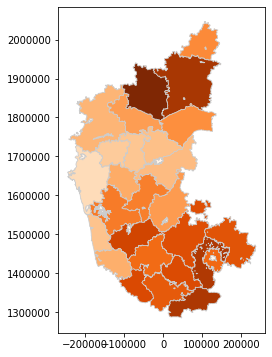

In [23]:
variable = 'vindex1'
# set the range for the choropleth
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))                                                                                 
merged.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8')

In [24]:
ax.axis('off')
# add a title
ax.set_title('Vulnerability', fontdict={'fontsize': '18', 'fontweight' : '3'})
# create an annotation for the data source
cax = fig.add_axes([0.14, 0.1, 0.7, 0.01])
sm4 = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=0, vmax=0.35))
# empty array for the data range
sm4._A = []
# add the colorbar to the figur
cbar = fig.colorbar(sm4,cax= cax,orientation ='horizontal')
#saving our map as .png file.
fig.savefig(r'C:\Users\Pranjali\Downloads\KA-V-2001.png', dpi=300)